In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters as fl
from skimage.color import rgb2gray
from skimage import io
from skimage.transform import rescale
from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage.feature import canny
from scipy import ndimage as ndi
import io
import cv2
import glob
import PIL
from PIL import Image, ImageDraw

In [2]:
def plot_image(img, title='Image'):
    plt.figure(figsize=[5,5])
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [5]:
def bbox(image):
    im_copy = image.copy()
    image = (255*rescale(image,0.25)).astype(np.uint8)
    proto = np.zeros_like(image)
    image = image[:-35,...]
    img = np.zeros_like(image)
    blur = cv2.medianBlur(image, 11)
    # blur = image
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)

    canny = cv2.Canny(thresh, 120, 255, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    opening = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
    dilate = cv2.dilate(opening, kernel, iterations=2)

    cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    min_area = 3000
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            cv2.drawContours(img, [c], -1, (255, 0,0,0), 2)
    
    ## Start Bounding Box Stuff
    proto[:-35,...]=img
    box = proto
    box = rescale(box,4)
    image = im_copy
#     image = (255 * image).astype(np.uint8)

    mask=box.copy()
    m = mask[...,0]
    alpha = np.zeros_like(m)
    alpha[m>0]=1
    mask = np.concatenate((mask,alpha[...,None]),axis=-1)
    
    
    box = rgb2gray(box)
    x,y = np.nonzero(box)

    xm = x.min()
    xma = x.max()

    x, y = np.nonzero(box[xm+15:xma-15,:])
    ym = y.min()
    yma = y.max()

    mask = (255*(mask)).astype(np.uint8)
    mask = Image.fromarray(mask,mode='RGBA')
    img = Image.fromarray(image)
    draw = ImageDraw.Draw(img) 
    draw.rectangle([ym,xm,yma,xma], outline=(0,255,0,1), width=20)
    img = img.convert('RGBA')
#     new_img = Image.blend(img, mask, 0.5)
    img.paste(mask,mask)
    img.show()
    
    return img, (xma-xm,yma-ym)

In [6]:
image = cv2.imread('../data/val/201201004_LIMI_000883.jpg')
bbox(image)

(<PIL.Image.Image image mode=RGBA size=2994x2320 at 0x1C27AD2A90>, (395, 2991))

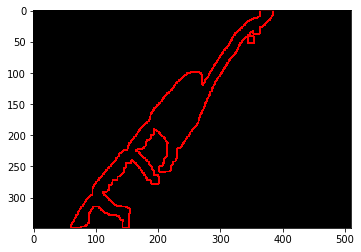

In [69]:
box = bbox(image)
box_proto[:-35,...]=box
box = box_proto
box = rescale(box,4)
image = rescale(image,4)

In [70]:
mask=box.copy()

In [71]:
m = mask[...,0]
alpha = np.zeros_like(m)
alpha[m>0]=1
mask = np.concatenate((mask,alpha[...,None]),axis=-1)

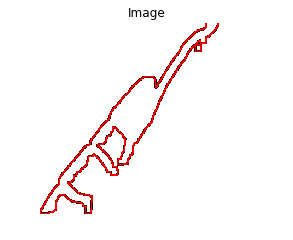

In [72]:
plot_image(mask)

In [73]:
# image = rgb2gray(image)
image = (255 * image).astype(np.uint8)

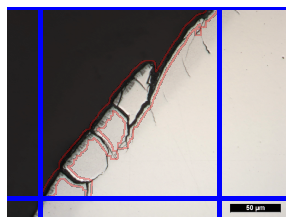

In [74]:
box = rgb2gray(box)
x,y = np.nonzero(box)

xm = x.min()
xma = x.max()

x, y = np.nonzero(box[xm+15:xma-15,:])
ym = y.min()
yma = y.max()

plt.figure(figsize=[5,5])
plt.imshow(image, cmap='gray')
plt.imshow(mask,alpha=0.3, cmap='Reds')
plt.axvline(ym,color='b',linewidth=5)
plt.axvline(yma, color='b',linewidth=5)
plt.axhline(xm,color='b',linewidth=5)
plt.axhline(xma, color='b',linewidth=5)
plt.axis('off')
plt.show()

# x = plt.figure()
# response = [plt.imshow(image,cmap='gray'),
#             plt.imshow(mask,alpha=0.3, cmap='Reds'),
#             plt.axvline(ym,color='b',linewidth=5),
#             plt.axvline(yma, color='b',linewidth=5),
#             plt.axhline(xm,color='b',linewidth=5),
#             plt.axhline(xma, color='b',linewidth=5),
#             plt.axis('off')
#            ]
# canvas = plt.get_current_fig_manager().canvas
# canvas.draw()
# pil_image = PIL.Image.frombytes('RGB', canvas.get_width_height(),canvas.tostring_rgb())
# plt.close()
# image = np.asarray(pil_image)
# plt.figure(figsize=[5,5])
# plt.imshow(image, cmap='gray')
# plt.imshow(mask,alpha=0.3, cmap='Reds')
# plt.axvline(ym,color='b',linewidth=5)
# plt.axvline(yma, color='b',linewidth=5)
# plt.axhline(xm,color='b',linewidth=5)
# plt.axhline(xma, color='b',linewidth=5)
# plt.axis('off')
# plt.save()
# plt.show()
mask = (255*(mask)).astype(np.uint8)
mask = Image.fromarray(mask,mode='RGBA')
img = Image.fromarray(image)
draw = ImageDraw.Draw(img) 
draw.rectangle([ym,xm,yma,xma], outline=(0,255,0,1), width=20)
img = img.convert('RGBA')
# new_img = Image.blend(img, mask, 0.5)
img.paste(mask,(0,0),mask)
new_img.show()

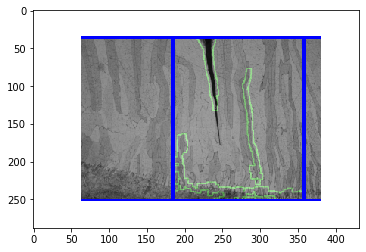

In [337]:
plt.imshow(image)